In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [27]:
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test,y_test) = mnist.load_data()
x_train_full.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

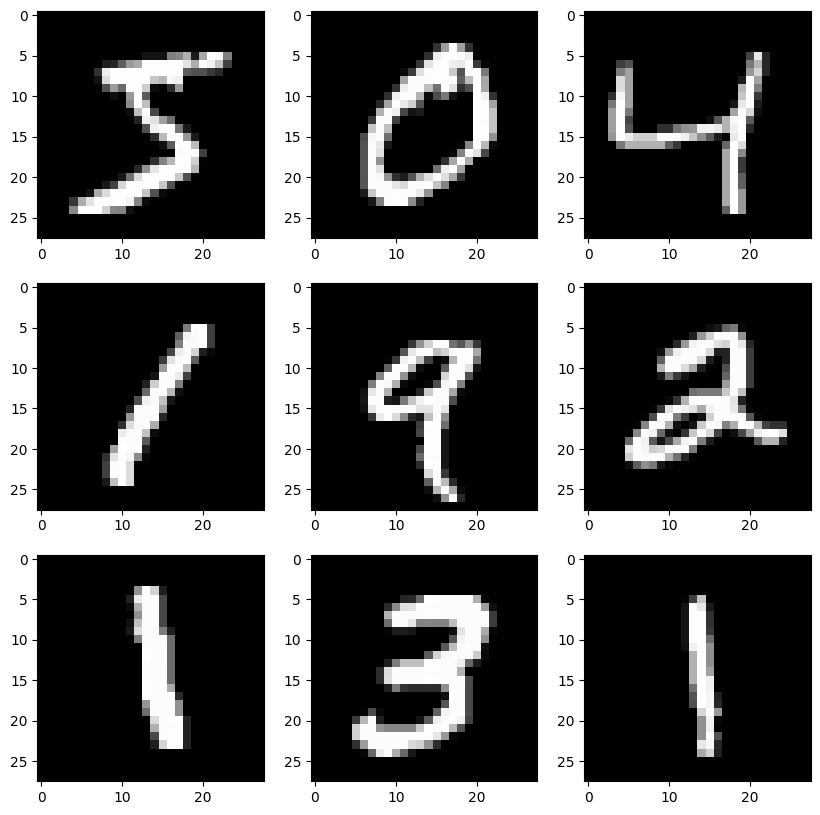

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i,j].imshow(x_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [31]:
x_valid, x_train = x_train_full[:5000] / 255 , x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
x_test = x_test / 255
""" Normalization done -> get all values into same range values such as 0 to 1  (these are gray scale image and we have 0 to 255 values in here like white to black)"""

' Normalization done -> get all values into same range values such as 0 to 1  (these are gray scale image and we have 0 to 255 values in here like white to black)'

In [32]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
y_train[1]

3

In [35]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [36]:
class_names[y_train[1]]

'3'

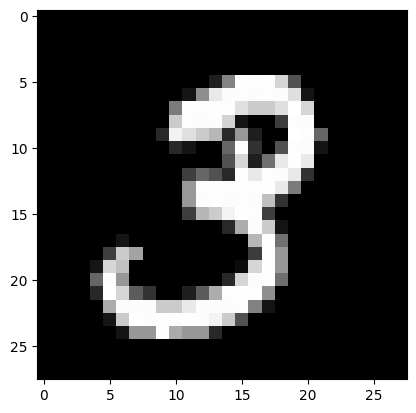

In [37]:
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Sigmoid: Probabilities produced by a Sigmoid are independent.
# Softmax: The outputs are interrelated. The sum of all outputs are 1. 

""" It doesn't allow for the activation of all of the neurons at the same time. i.e., if any input is negative, 
    ReLU converts it to zero and doesn't allow the neuron to get activated.
    This means that only a few neurons are activated, making the network easy for computation. """

""" Generally , we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance , and Softmax function use in last output layer """

' Generally , we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance , and Softmax function use in last output layer '

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers

In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [43]:
x_train.shape

(55000, 28, 28)

In [44]:
# batch
""" 
Another reason for why you should consider using batch is that when you train your deep learning model without splitting to batches, then your deep learning algorithm(may be a neural network) has to store errors values for all those 100000 images in the memory and this will cause a great decrease in speed of training. """

# Epoch
""" 
Epochs work in neural networks by allowing the algorithm to learn from the data. During each epoch, the algorithm is exposed to the same data multiple times. This allows the algorithm to learn from the data and improve its accuracy. The more epochs the algorithm has seen, the more accurate the model will be """

' \nEpochs work in neural networks by allowing the algorithm to learn from the data. During each epoch, the algorithm is exposed to the same data multiple times. This allows the algorithm to learn from the data and improve its accuracy. The more epochs the algorithm has seen, the more accurate the model will be '

In [45]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6070 - accuracy: 0.8424 - val_loss: 0.3061 - val_accuracy: 0.9132
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2870 - accuracy: 0.9189 - val_loss: 0.2487 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2353 - accuracy: 0.9337 - val_loss: 0.1993 - val_accuracy: 0.9452
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2011 - accuracy: 0.9432 - val_loss: 0.1767 - val_accuracy: 0.9524
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1762 - accuracy: 0.9496 - val_loss: 0.1584 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1559 - accuracy: 0.9554 - val_loss: 0.1456 - val_accuracy: 0.9610
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1398 - accuracy: 0.9605 - val_loss: 0.1319 - val_accuracy:

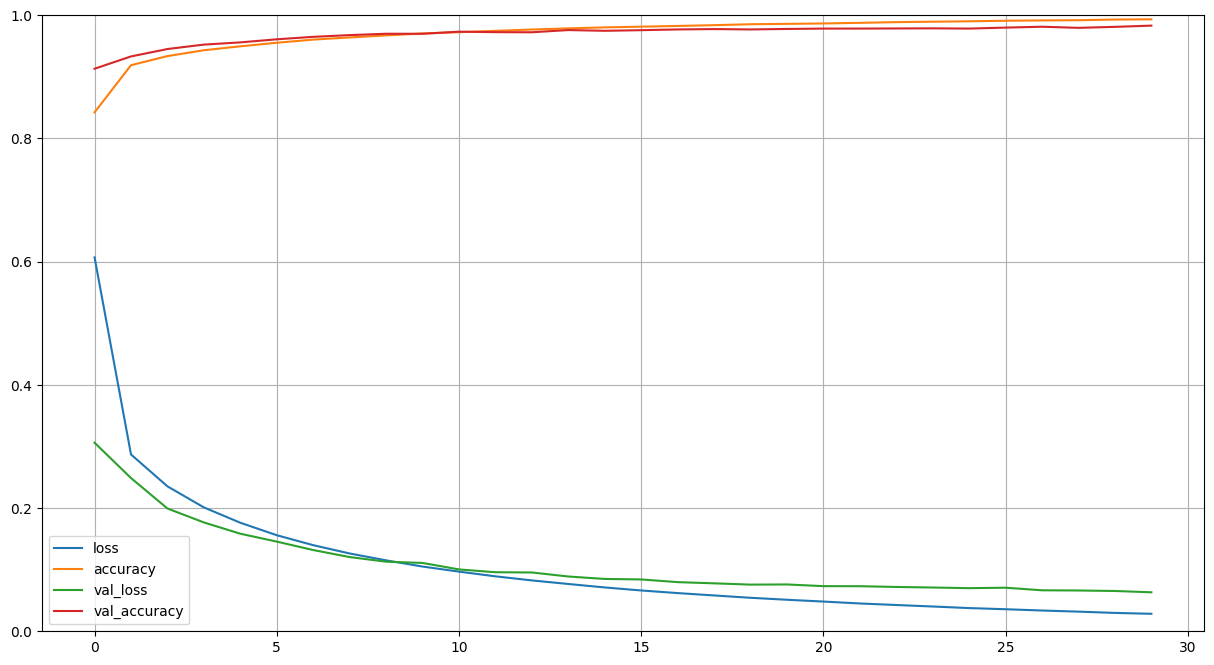

In [47]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
model.evaluate(x_test, y_test)
""" [loss, accuracy] """

313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9776


[0.07068818062543869, 0.9775999784469604]

In [52]:
model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


array([[1.6482833e-06, 5.9496062e-07, 2.0522180e-04, ..., 9.9820447e-01,
        4.2680153e-05, 3.2090198e-04],
       [6.1786491e-06, 1.4776631e-05, 9.9990422e-01, ..., 7.9485099e-11,
        1.6706568e-05, 2.2284971e-13],
       [2.5152040e-05, 9.9714577e-01, 3.2547966e-04, ..., 1.7274040e-03,
        3.3804416e-04, 5.0404542e-06],
       ...,
       [2.1410720e-10, 1.6315445e-09, 2.7493730e-11, ..., 9.0011072e-06,
        1.5766942e-07, 6.8111958e-06],
       [2.5883620e-07, 2.2979986e-08, 3.8472034e-09, ..., 8.3639211e-09,
        5.5799825e-04, 1.2517281e-08],
       [6.0510808e-07, 2.1687406e-10, 2.1430715e-08, ..., 8.5150628e-12,
        6.4144854e-09, 2.2119540e-10]], dtype=float32)

In [49]:
y_prob = model.predict(x_test)
y_classes = y_prob.argmax(axis=1)
y_classes

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [50]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

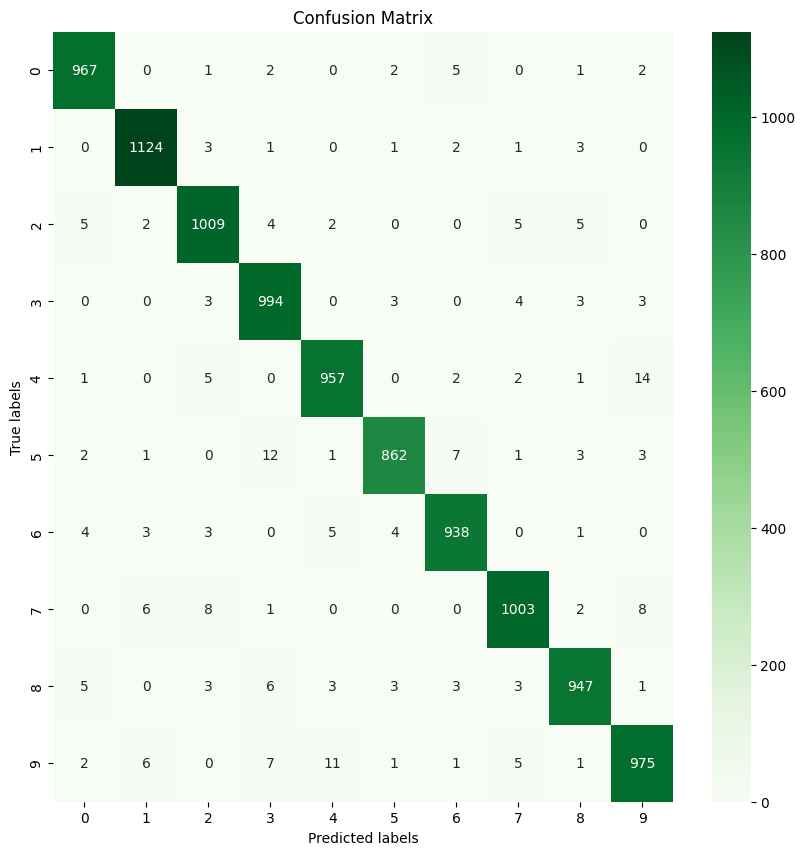

In [58]:
import seaborn as sb
import matplotlib.pyplot as plt

fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

plt.show()
